¡Hola!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-scientist. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

# Proyecto integrado - Sprint 6
De: Ilse Natalia Salinas Vázquez

### Descripción general: 
Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.

Delante de ti hay datos que se remontan a 2016. Imaginemos que es diciembre de 2016 y estás planeando una campaña para 2017.

Lo importante es adquirir experiencia de trabajo con datos. Realmente no importa si estás pronosticando las ventas de 2017 en función de los datos de 2016 o las ventas de 2027 en función de los datos de 2026.

El dataset contiene una columna "rating" que almacena la clasificación ESRB de cada juego. El Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.

In [1]:
# Se importan las librerias necesarias de python para el proyecto
# Se lee la informacion correspondiente al dataset del proyecto

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/datasets/games.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>


Te recomiendo que como buena práctica separes la carga de las librerías y la carga de las bases de datos. 
</div>

Se puede observar de la información obtenida de este dataframe que existen valores nulos y con el tipo de dato correspondiente erróneo en algunas columnas, por lo que es necesario hacer una preparación de la información donde hay que verfificarla y corregirla.

In [2]:
# Se empieza primero con convertir el titulo de todas las columnas del df en minusculas
nuevos_nombres = {columna: columna.lower() for columna in df.columns}
df = df.rename(columns=nuevos_nombres)
print(df.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


In [3]:
# Se verifica una muestra primero para determinar cuales de estos datos necesitan cambiar su tipo
print(df.sample(3))

                                          name platform  year_of_release  \
7716                                The Hobbit      GBA           2003.0   
4500   InuYasha: The Secret of the Cursed Mask      PS2           2004.0   
13152                        Fighter Destiny 2      N64           1999.0   

              genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
7716       Platform      0.14      0.05       0.0         0.00          67.0   
4500   Role-Playing      0.21      0.17       0.0         0.06          51.0   
13152      Fighting      0.04      0.01       0.0         0.00           NaN   

      user_score rating  
7716         9.2      E  
4500         8.1      T  
13152        NaN    NaN  


En este caso se puede observar que columnas como year_of_release, critic_score y user_score deben de cambiar su tipo de dato en este caso a entero los primeros dos y flotante el último para que no existan errores en un análisis posterior de la información. No obstante es necesario antes de realizar este paso tratar los valores ausentes y rellenarlos de la forma más adecuada.

In [4]:
# Se rellenan con ceros los datos ausentes de las columnas year_of_release, critic_score y user_score
df['year_of_release'] = df['year_of_release'].fillna(0)
df['critic_score'] = df['critic_score'].fillna(0)

# Se rellena los valores 'tbd' (to be determined) con NaN para la columna user_score antes de ponerle ceros
df['user_score'] = df['user_score'].replace('tbd', pd.NA)
df['user_score'] = df['user_score'].fillna(0)

# Se cambian los tipos de datos de estas columnas
df['year_of_release'] = df['year_of_release'].astype(int)
df['critic_score'] = df['critic_score'].astype(int)
df['user_score'] = df['user_score'].astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  int64  
 9   user_score       16715 non-null  float64
 10  rating           9949 non-null   object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


Aún se puede observar que hay columnas que tienen datos faltantes, no es necesario cambiar su tipo pero para el análisis posterior trataremos estos valores para no tener problemas con ellos en un futuro. 

In [5]:
# Al no tener informacion sobre el nombre, genero o ratign de estos juegos, para fines del analisis se cambiara a indeterminado
df['name'] = df['name'].fillna("indeterminate")
df['genre'] = df['genre'].fillna("indeterminate")
df['rating'] = df['rating'].fillna("indeterminate")

Una vez que se tienen los datos preparados, procedemos a hacer los cálculos necesarios para determinar las ventas totales de 
cada juego y analizar los años en los que fueron lanzados, pero antes hay que verificar si no hay nombres de videojuegos repetidos y en dado caso de que si eliminarlos.

In [6]:
# Primero todo lo pasamos a minusculas y despues se verifica si hay nombre de videojuegos repetidos
df['name'] = df['name'].str.lower()
hay_duplicados_name = df['name'].duplicated().any()

if hay_duplicados_name:
    print("Hay nombres de videojuegos duplicados en el DataFrame.")
else:
    print("No hay nombres de videojuegos duplicados en el DataFrame.")

Hay nombres de videojuegos duplicados en el DataFrame.


El resultado anterior nos muestra que hay nombres de videojuegos repetidos por lo que eliminaremos aquellos que tienen nombre similar y posteriormente hacer el cálculo de las ventas totales correspondiente a cada juego. 

In [7]:
# Se restablece el indice antes de eliminar las filas duplicadas
df.reset_index(drop=True, inplace=True)

# Se eliminan las filas duplicadas basadas en la columna 'name'
df = df.drop_duplicates(subset=['name'])

# Se calcula las ventas totales para cada juego y se agregan en una nueva columna 'total_sales'
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

print(df.info())
print()
print(df.sample(3))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11560 entries, 0 to 16712
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             11560 non-null  object 
 1   platform         11560 non-null  object 
 2   year_of_release  11560 non-null  int64  
 3   genre            11560 non-null  object 
 4   na_sales         11560 non-null  float64
 5   eu_sales         11560 non-null  float64
 6   jp_sales         11560 non-null  float64
 7   other_sales      11560 non-null  float64
 8   critic_score     11560 non-null  int64  
 9   user_score       11560 non-null  float64
 10  rating           11560 non-null  object 
 11  total_sales      11560 non-null  float64
dtypes: float64(6), int64(2), object(4)
memory usage: 1.1+ MB
None

                                      name platform  year_of_release   genre  \
3498   spyro orange: the cortex conspiracy      GBA             2004  Action   
10664          monk

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Hola, Ilse! Muy buen trabajo en la sección, ajustaste los nombres de las columnas a minúsculas con el uso de la función str.lower(), cambiaste el tipo de variable de dos de las variables de la base de datos, consideraste ajustar los valores ausentes de las variables identificadas de score y muy buen trabajo con la suma de todas las ventas. 
    
   

</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    

    
Solamente te recomiendo que en estas columnas de 'critic_score'  mejor los completes con 'Unknown', puede ser en una columna duplicada para que puedas desarrollar los análisis posteriores. Además, te sugiero verificar si en el resto de las columnas no cuentas con datos ausentes que se deban ajustar.     

</div>

Una vez que se tiene la información del dataframe ordenada y que no existen valores duplicados o ausentes, se continuar con el análisis de datos. Cabe destacar que muchos juegos pueden pertenencer a una misma plataforma, es por eso que independientemente del juego que tuvo más ventas, el ánalisis se hace conforme a la plataforma la cual puede haber tenido ventas de distintas cantidades en diferentes años. Antes de hacer el análisis, primero verificaremos cuantas plataformas son las que conforman el dataframe.

In [8]:
# Se obtiene la lista de plataformas unicas
plataformas_unicas = df['platform'].unique()

# Se calcula el numero total de plataformas unicas
total_plataformas = len(plataformas_unicas)

print("Total de plataformas únicas:", total_plataformas)
print()

Total de plataformas únicas: 31



Con base en esta informacion, ahora es momento de saber cuantas ventas se han hecho conforme el año de lanzamiento. En general, para el análisis y conteo es importante primero eliminar aquellos años de lanzamiento y ventas totales con valor cero ya que interfieren con el resultado final. 

In [9]:
# Se filtran los datos para excluir los años de lanzazmiento y ventas totales igual a cero
df_filtrado = df[(df['total_sales'] != 0) & (df['year_of_release'] != 0)]

# Agrupar los datos por plataforma y sumar las ventas totales
ventas_por_año = df_filtrado.groupby('year_of_release')['total_sales'].sum().reset_index()
print(ventas_por_año)

    year_of_release  total_sales
0              1980        10.88
1              1981        31.09
2              1982        26.16
3              1983        15.67
4              1984        49.13
5              1985        53.54
6              1986        37.08
7              1987        21.24
8              1988        39.41
9              1989        67.73
10             1990        43.13
11             1991        31.50
12             1992        72.16
13             1993        48.16
14             1994        73.36
15             1995        82.69
16             1996       193.51
17             1997       193.01
18             1998       241.18
19             1999       230.37
20             2000       178.77
21             2001       296.06
22             2002       325.39
23             2003       273.98
24             2004       334.16
25             2005       376.40
26             2006       439.51
27             2007       449.74
28             2008       466.30
29        

Esta información es útil para determinar el rango de años en donde hubo mayor número de ventas independientemente de la plataforma, pero también es importante saber quienes están a la cabeza para idear estrategias similares a la de estos años. 

A continuacion también se puede observar una matriz de datos en donde se ha agrupado la información del dataframe conforme a la plataforma y la cantidad de ventas que ha tenido por año para posteriormente mostrar esta distribución visualmente. El objetivo de esta matriz es simplemente también rellnar con ceros las ventas totales si en la intersección de plataforma con año de lanzamiento no hubo como tal.

In [10]:
# Utilizar pivot_table para obtener el número de ventas por año y plataforma
ventas_por_año_y_plataforma = df_filtrado.pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum', fill_value=0)

print(ventas_por_año_y_plataforma)

year_of_release   1980   1981   1982  1983   1984   1985   1986   1987   1988  \
platform                                                                        
2600             10.88  31.09  26.16  5.84   0.27   0.45   0.67   1.48   0.74   
3DO               0.00   0.00   0.00  0.00   0.00   0.00   0.00   0.00   0.00   
3DS               0.00   0.00   0.00  0.00   0.00   0.00   0.00   0.00   0.00   
DC                0.00   0.00   0.00  0.00   0.00   0.00   0.00   0.00   0.00   
DS                0.00   0.00   0.00  0.00   0.00   0.02   0.00   0.00   0.00   
GB                0.00   0.00   0.00  0.00   0.00   0.00   0.00   0.00   0.00   
GBA               0.00   0.00   0.00  0.00   0.00   0.00   0.00   0.00   0.00   
GC                0.00   0.00   0.00  0.00   0.00   0.00   0.00   0.00   0.00   
GEN               0.00   0.00   0.00  0.00   0.00   0.00   0.00   0.00   0.00   
GG                0.00   0.00   0.00  0.00   0.00   0.00   0.00   0.00   0.00   
N64               0.00   0.0

A continuación se puede ver una gráfica que muestra la distribución de estas ventas por plataforma a lo largo de los años, donde se puede apreciar el momento en el que tuvieron mayor número de ventas.

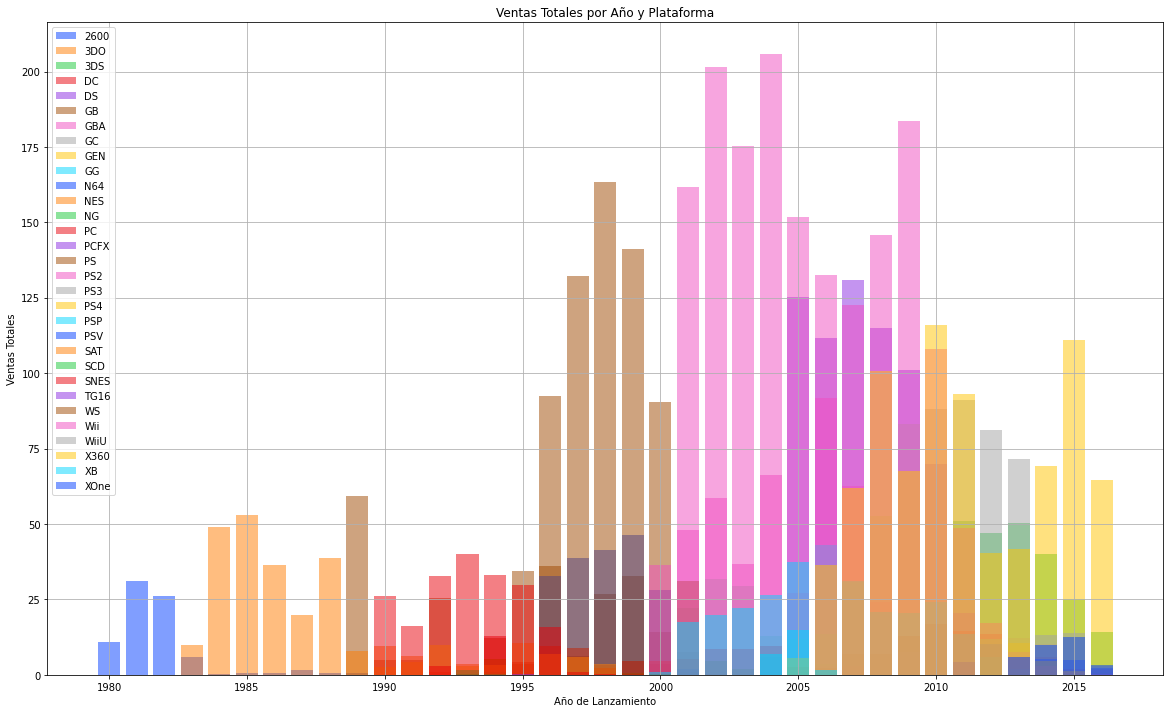

In [11]:
# Se configura el tamaño de la gráfica de barras
plt.figure(figsize=(20, 12))

# Para diferenciar entre plataformas, se utiliza una paleta de colores
palette = sns.color_palette("bright", n_colors=len(ventas_por_año_y_plataforma.index))

# Se itera sobre cada plataforma y graficar barras con colores diferentes
for plataforma, color in zip(ventas_por_año_y_plataforma.index, palette):
    ventas_por_plataforma = ventas_por_año_y_plataforma.loc[plataforma]
    plt.bar(ventas_por_plataforma.index, ventas_por_plataforma, alpha=0.5, label=plataforma, color=color)

plt.xlabel('Año de Lanzamiento')
plt.ylabel('Ventas Totales')
plt.title('Ventas Totales por Año y Plataforma')
plt.legend()  # Se muestra la leyenda con los nombres de las plataformas

plt.grid(True)
plt.show()

La gráfica nos muestra el momento en que una plataforma comenzó a lanzar juegos y también su punto de mayor popularidad. Esta información es de gran utilidad para definir estrategias para mantener o incrementar la popularidad, ya que se puede notar que el plazo en el que las ventas van aumentando es de tres a cinco años aproximadamente por plataforma antes de disminuir. 

Con fines de desarrollar un modelo para el año 2017, se considerarán únicamente las cinco plataformas líderes junto con sus años  de lanzamiento. Es por ello que se realizará nuevamente una distribución de estas cinco plataformas con mayor numero de ventas ya que ese sería el escenario ideal para el 2017.

In [12]:
# Se identifica las plataformas lideres en ventas
plataformas_lideres = df_filtrado.groupby('platform')['total_sales'].sum().nlargest(5).reset_index()

print("Plataformas líderes en ventas:")
print(plataformas_lideres)

Plataformas líderes en ventas:
  platform  total_sales
0      PS2      1120.11
1      Wii       769.65
2       PS       697.10
3       DS       690.60
4     X360       569.25


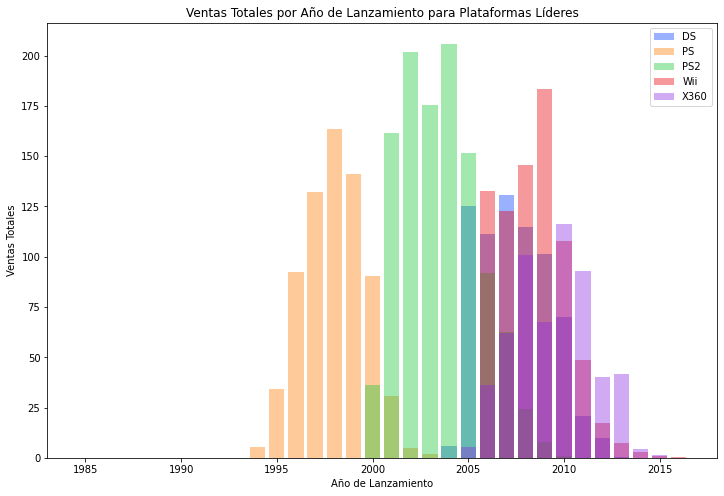

In [13]:
# Se filtran los datos para incluir solo las ventas de las plataformas líderes
df_plataformas_lideres = df_filtrado[df_filtrado['platform'].isin(plataformas_lideres['platform'])]

# Se utiliza pivot_table para obtener el número de ventas por año y plataforma para las plataformas líderes
ventas_por_año_plataformas_lideres = df_plataformas_lideres.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum', fill_value=0)

# Se configura el tamaño de la gráfica de barras
plt.figure(figsize=(12, 8))

# Se itera sobre cada plataforma líder para graficar barras de diferentes colores
for plataforma, color in zip(ventas_por_año_plataformas_lideres.columns, sns.color_palette('bright', n_colors=len(ventas_por_año_plataformas_lideres.columns))):
    plt.bar(ventas_por_año_plataformas_lideres.index, ventas_por_año_plataformas_lideres[plataforma], label=plataforma, color=color, alpha=0.4)

plt.xlabel('Año de Lanzamiento')
plt.ylabel('Ventas Totales')
plt.title('Ventas Totales por Año de Lanzamiento para Plataformas Líderes')
plt.legend()

plt.show()

Con la información anterior y esta gráfica que muestra los datos de las ventas totales producidas por las cinco plataformas líderes, nos puede dar una idea de lo fuertes que son ya que tienen una posición fija en el mercado. No obstante estas plataformas a pesar de tener mayor popularidad presentan el problema de un aumento en los proximos tres a cinco años y después disminuye el número de ventas. 

A pesar de este fenómeno estas plataformas se han manejado de la forma más adecuada siendo el top cinco entre los usuarios. Esto muy problemente también influye la cantidad de juegos populares lanzados en cada una de las plataformas y la buena experiencia que han tenido los usuarios al jugarlos. Este modelo es bueno a considerar para las ventas del 2017 y para ello es necesario tener planes y desarrollos de historias que cautiven a los usuarios y también tratar de conseguir patrocinadores por parte de una de estas plataformas. 

A continuación también se aprecia cinco diagramas de caja correspondientes a estas plataformas líderes donde se puede visualizar la distribución de los datos, identificar valores atípicos y comparar la variabilidad entre ellas. Como las distribuciones de las ventas totales de las plataformas no son simétricas, es por eso que presentan muchos valores atipicos que pueden ser causados por el cambio drástico de aumento o disminucion de las ventas y que no se mantiene necesariamente constante a lo largo del tiempo.

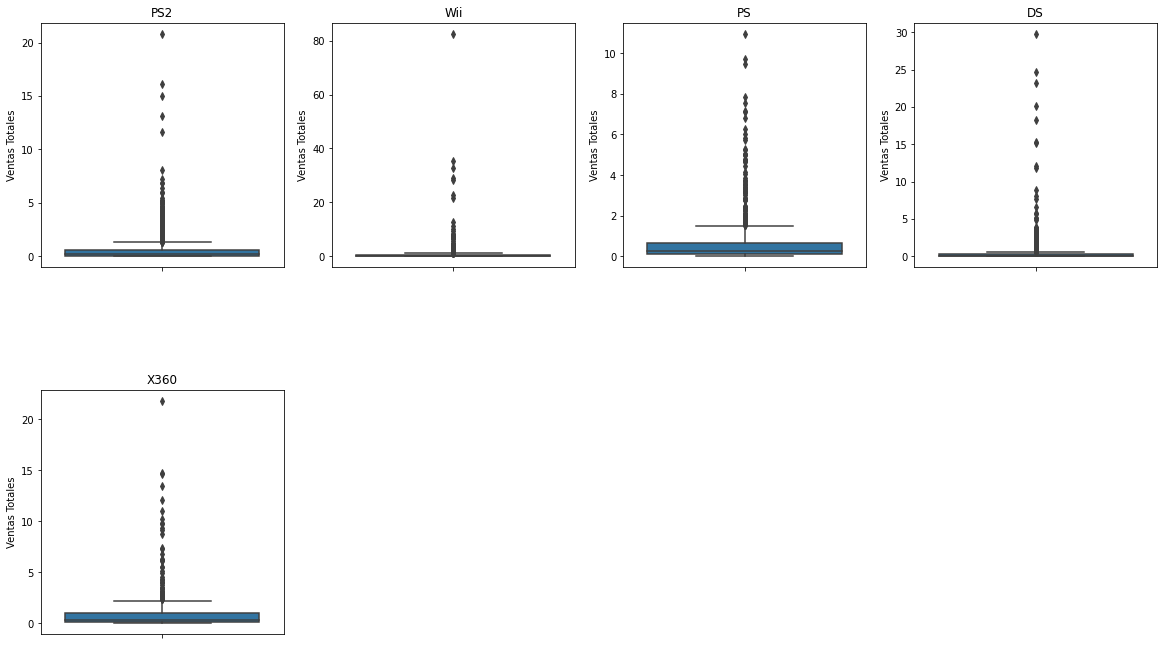

In [14]:
# Ajusta el tamaño de la figura
plt.figure(figsize=(20, 18))  

# Crea un diagrama de caja para cada plataforma
for i, plataforma in enumerate(plataformas_lideres['platform'], 1):
    plt.subplot(3, 4, i)  # Selecciona la posición del subplot
    sns.boxplot(data=df_filtrado[df_filtrado['platform'] == plataforma], y='total_sales')
    plt.title(plataforma)
    plt.xlabel('')
    plt.ylabel('Ventas Totales')

# Ajusta el espacio entre los subplots
plt.subplots_adjust(hspace=0.5)  

plt.show()


Dentro del análisis de este proyectos, observaremos cómo las reseñas de usuarios (columna critic_score que va de 0-100) y profesionales afectan las ventas de la plataforma Wii. A continuación se observa una gráfica de dispersión mostrado las ventas totales contra la puntuación dada por los usuarios. 

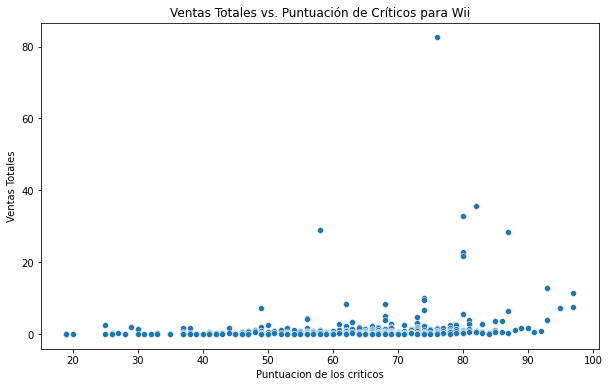

Correlación entre las reseñas de los críticos y las ventas totales: 0.19743786802782132


In [15]:
# Se filtra el df para incluir solo los juegos de la plataforma Wii
df_wii = df_filtrado[df_filtrado['platform'] == 'Wii']

# Se eliminan las filas con valores faltantes o iguales a cero en la columna critic_score
df_wii = df_wii[(df_wii['critic_score'].notna()) & (df_wii['critic_score'] != 0)]

# Se crea el grafico de dispersion
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_wii, x='critic_score', y='total_sales')
plt.xlabel('Puntuacion de los criticos')
plt.ylabel('Ventas Totales')
plt.title('Ventas Totales vs. Puntuación de Críticos para Wii')
plt.show()

# Se calcula la correlacion entre las reseñas de los criticos y las ventas totales
correlation = df_wii['critic_score'].corr(df_wii['total_sales'])
print("Correlación entre las reseñas de los críticos y las ventas totales:", correlation)

En este caso, la correlación de 0.19542486320999652 indica una relación débil, es decir, significa que hay una asociación débil entre la puntuación de los críticos y las ventas totales de los juegos. Esto sugiere que la puntuación de los críticos no tienen un impacto significativo en las ventas totales o que hay otros factores que influyen más en las ventas como puede ser el precio de la consola, la calidad o precio de los juegos lanzados, el género del juego que es de más agrado a los jugadores, entre otros.

Ahora realicemos un análisis a una una distribución general de los juegos por género y cómo esto afecta al número de ventas realizadas por los usuarios. 

Cantidad de géneros únicos: 13


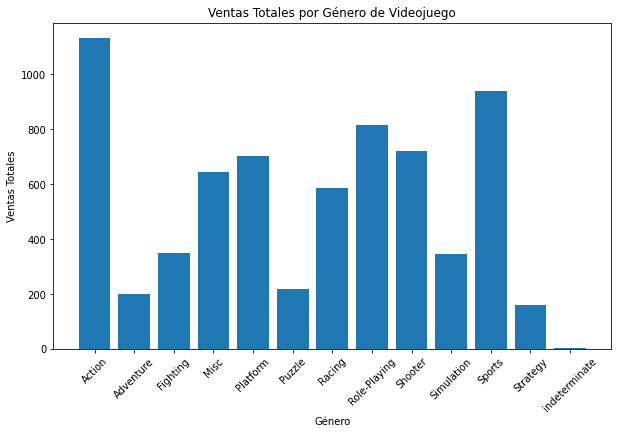

In [16]:
# Se obtiene una la lista de los generos unicos y se cuentan
generos_unicos = df_filtrado['genre'].unique()
cantidad_generos_unicos = len(generos_unicos)
print("Cantidad de géneros únicos:", cantidad_generos_unicos)

# Se agrupan los datos por genero y se calcula las ventas totales para cada uno de ellos
ventas_por_genero = df_filtrado.groupby('genre')['total_sales'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(ventas_por_genero['genre'], ventas_por_genero['total_sales'])
plt.xlabel('Género')
plt.ylabel('Ventas Totales')
plt.title('Ventas Totales por Género de Videojuego')
plt.xticks(rotation=45)
plt.show()

Con base en la información de la gráfica, se puede observar que  el género más popular es de deportes por lo tanto conviene hacer un plan de desarrollo en donde el modelo del 2017 se enfoque únicamente en lanzar juegos de este género ya que es el más popular entre los usuarios. No obtanste éste decisión puede variar según la región a la que se aplique ya que esto es simplemente una generalización.

Ahora con respecto a cada una de las regiones (NA, UE, JP) es importante determinar cuales son las cinco plataformas prinicipales que tienen mayor número de ventas y analizar si entre regiones existen diferencias. Esto con el objetivo de hacer estrategias de marketing personalizadas a cada región ya que un modelo puede diferir del otro según sean las preferencias de los usuarios. 

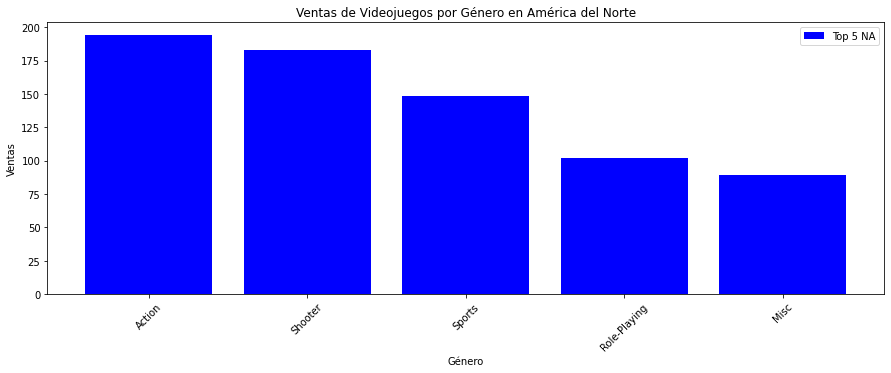

In [17]:
# Se filtran primero los datos para excluir los años de lanzazmiento y ventas de cada region igual a cero
df_filtrado_2 = df[(df['na_sales'] != 0) & (df['eu_sales'] != 0) & (df['jp_sales'] != 0) & (df['year_of_release'] != 0)]

# Despues se calcula las cinco plataformas con mayores ventas en NA
top_plataformas_na = df_filtrado_2.groupby('platform')['na_sales'].sum().nlargest(5)

# Se filtran los datos para incluir solo las plataformas lideres en NA
df_na_top = df_filtrado_2[df_filtrado_2['platform'].isin(top_plataformas_na.index)]

# Se calcula las ventas por genero en NA
ventas_por_genero_na = df_na_top.groupby('genre')['na_sales'].sum().nlargest(5)

plt.figure(figsize=(15, 5))
plt.bar(ventas_por_genero_na.index, ventas_por_genero_na.values, label='Top 5 NA', color='blue')
plt.title('Ventas de Videojuegos por Género en América del Norte')
plt.xlabel('Género')
plt.ylabel('Ventas')
plt.xticks(rotation=45)
plt.legend()
plt.show()

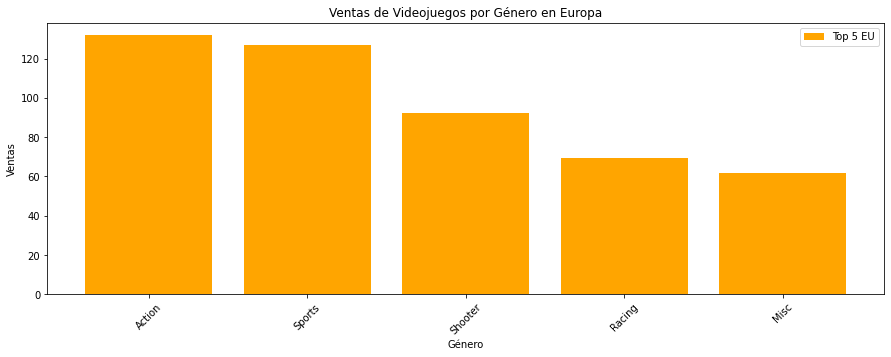

In [18]:
# Se calcula las cinco plataformas con mayores ventas en EU
top_plataformas_eu = df_filtrado_2.groupby('platform')['eu_sales'].sum().nlargest(5)

# Se filtran los datos para incluir solo las plataformas lideres en EU
df_eu_top = df_filtrado_2[df_filtrado_2['platform'].isin(top_plataformas_eu.index)]

# Se calcula las ventas por genero en EU
ventas_por_genero_eu = df_eu_top.groupby('genre')['eu_sales'].sum().nlargest(5)

plt.figure(figsize=(15, 5))
plt.bar(ventas_por_genero_eu.index, ventas_por_genero_eu.values, label='Top 5 EU', color='orange')
plt.title('Ventas de Videojuegos por Género en Europa')
plt.xlabel('Género')
plt.ylabel('Ventas')
plt.xticks(rotation=45)
plt.legend()
plt.show()

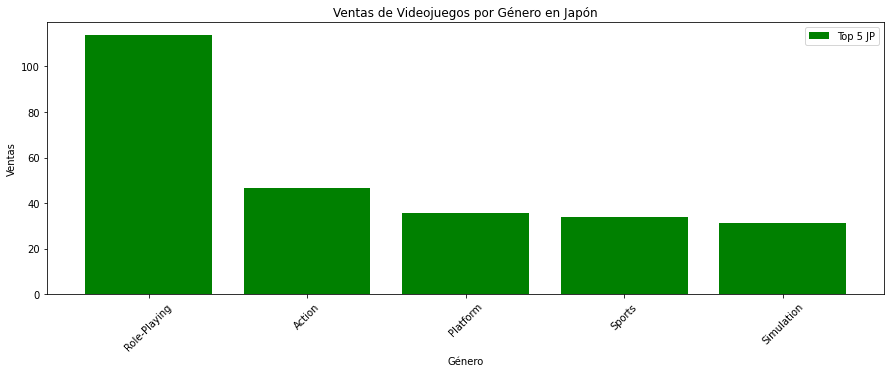

In [19]:
# Se calcula las cinco plataformas con mayores ventas en JP
top_plataformas_jp = df_filtrado_2.groupby('platform')['jp_sales'].sum().nlargest(5)

# Se filtran los datos para incluir solo las plataformas lideres en JP
df_jp_top = df_filtrado_2[df_filtrado_2['platform'].isin(top_plataformas_jp.index)]

# Se calcula las ventas por genero en JP
ventas_por_genero_jp = df_jp_top.groupby('genre')['jp_sales'].sum().nlargest(5)

plt.figure(figsize=(15, 5))
plt.bar(ventas_por_genero_jp.index, ventas_por_genero_jp.values, label='Top 5 JP', color='green')
plt.title('Ventas de Videojuegos por Género en Japón')
plt.xlabel('Género')
plt.ylabel('Ventas')
plt.xticks(rotation=45)
plt.legend()
plt.show()

Cantidad de clasificaciones únicas: 7
Clasificaciones únicas: ['E' 'M' 'T' 'E10+' 'K-A' 'EC' 'RP']



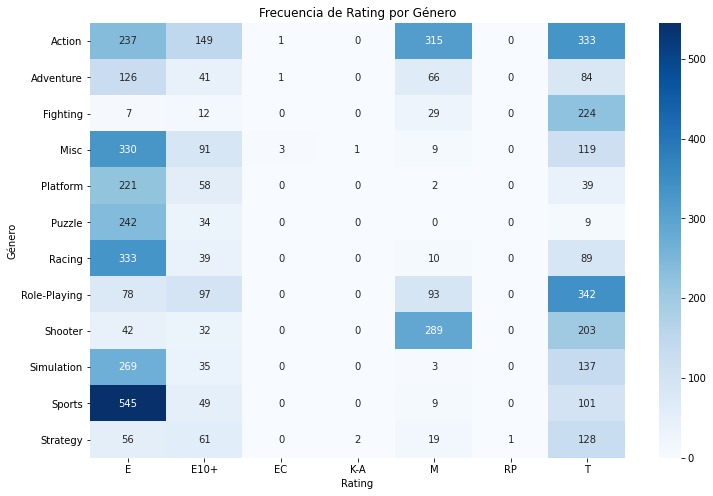

In [20]:
# Primero si la clasifiacion es indeterminada hay que eliminarla del analisis
df_filtrado_3 = df_filtrado[df_filtrado['rating'] != 'indeterminate']

# Se cuentan las clasificaciones unicas en la columna rating
clasificaciones_unicas = df_filtrado_3['rating'].nunique()
clasificaciones_unicas_cuales = df_filtrado_3['rating'].unique()

print("Cantidad de clasificaciones únicas:", clasificaciones_unicas)
print("Clasificaciones únicas:", clasificaciones_unicas_cuales)
print()

# Calcular el rating más común para cada género
rating_mas_comun_por_genero = df_filtrado_3.groupby('genre')['rating'].agg(lambda x: x.mode().iloc[0])

# Contar la frecuencia de cada rating para cada género
frecuencia_rating_por_genero = df_filtrado_3.groupby(['genre', 'rating']).size().unstack(fill_value=0)

# Crear la gráfica de barras
plt.figure(figsize=(12, 8))
sns.heatmap(frecuencia_rating_por_genero, cmap='Blues', annot=True, fmt='d')
plt.title('Frecuencia de Rating por Género')
plt.xlabel('Rating')
plt.ylabel('Género')
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>

Muy buen trabajo con el análisis exploratorio de los datos. Desarrollaste gráficas de box-plots para analizar ventas de las plataformas que más venden, scatter plots para ver la relación entre las score de usuarios y de los criticos respecto a las ventas, gráficas para identificar los juegos más populares en las distintas plataformas, gráficas de barras para analizar los géneros de juegos más populares y agregaste la conclusión y la interpretación de cada uno de estos resultados.   

</div>

 <div class="alert alert-block alert-warning">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>

Solamente te recomiendo desarrollar una gráfica de box-plots para analizar ventas de las plataformas que más venden. En este sentido en el eje de las X tendrías las plataforma y en el de las Y las ventas globales  

</div>

Co respecto a los gráficos de cada una de las tres regiones, se observa que cada una de ellas tiene géneros de preferencia diferentes y no necesariamente tiene que ser el de deportes el que más venda. Esta información hay que considerarla dentro de las estrategias de mercado porque si se implementa el mismo modelo en todas las regiones, puede dar resultados negativos como lo sería en la región de Japón donde tiene preferencia por los juegos de género de role-playing. 

Además, es importante destacar que independientemente del género, la clasificación que tenga dependerá si es apto o no para que el usuario lo juegue ya que muchas veces depende de la edad que tenga. Las clasifiaciones mostradas son las siguientes: E (Everyone), M (Mature), T (Teen), E10+ (Everyone 10 an older), K-A (Kids to Adults), EC (Early childhood). Se puede observar en la gráfica anterior, que hay una mayor frecuencia entre el género sports con la clasifiación E, haciendolo más viable para ayor cantidad de usuarios y a su vez permitiendo mayor numero de ventas. No obstante clasifiaciones que estén dirigidas más hacia la población adulta puede verse perjudicada ya que el número de usuarios compradores disminuye. 

Finalmente, el proyecto acaba con un ánalisis sobre dos las siguientes situaciones: las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas y las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes. Para ello es ncesario formular hipótesis nula y alternativa para verificar si se puede rechazar o no y para fines de este análisis se harán pruebas t de Student para muestras independientes las cuales estan definidas de tal forma si las muestras son iguales o diferntes.

Caso 1: Hipótesis sobre las calificaciones promedio de los usuarios para las plataformas Xbox One y PC

Hipótesis nula (H0): Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son iguales.

Hipótesis alternativa (H1): Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes.

In [21]:
from scipy.stats import ttest_ind

# Se filtra primero las califiaciones de los usuarios para que no tenga valores nulos o 0
df_filtrado_4 = df.dropna(subset=['user_score'])
df_filtrado_4 = df_filtrado_4[df_filtrado_4['user_score'] != 0]

# Se obtienen las calificaciones promedio de usuarios para Xbox One y PC
calificaciones_xbox_one = df_filtrado_4[df_filtrado_4['platform'] == 'Xbox One']['user_score']
calificaciones_pc = df_filtrado_4[df_filtrado_4['platform'] == 'PC']['user_score']

# Se realiza la prueba t de Student para muestras independientes
resultado_prueba = ttest_ind(calificaciones_xbox_one, calificaciones_pc, equal_var=False)

alfa = 0.05
if resultado_prueba.pvalue < alfa:
    print("Se rechaza la hipótesis nula.")
    print("Hay diferencias significativas en las calificaciones promedio de los usuarios entre Xbox One y PC.")
else:
    print("No se puede rechazar la hipótesis nula.")
    print("No hay suficiente evidencia para concluir que hay diferencias significativas en las calificaciones promedio de los usuarios entre Xbox One y PC.")


No se puede rechazar la hipótesis nula.
No hay suficiente evidencia para concluir que hay diferencias significativas en las calificaciones promedio de los usuarios entre Xbox One y PC.


Caso 2: Hipótesis sobre las calificaciones promedio de los usuarios para los géneros de Acción y Deportes:

Hipótesis nula (H0): Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.

Hipótesis alternativa (H1): Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

In [22]:
# Se obtienen las calificaciones promedio de usuarios para los géneros de Acción y Deportes
calificaciones_accion = df_filtrado_4[df_filtrado_4['genre'] == 'Action']['user_score']
calificaciones_deportes = df_filtrado_4[df_filtrado_4['genre'] == 'Sports']['user_score']

# Se realiza la prueba t de Student para muestras independientes
resultado_prueba = ttest_ind(calificaciones_accion, calificaciones_deportes, equal_var=False)

alfa = 0.05
if resultado_prueba.pvalue < alfa:
    print("Se rechaza la hipótesis nula.")
    print("Hay diferencias significativas en las calificaciones promedio de los usuarios entre los géneros de Acción y Deportes.")
else:
    print("No se puede rechazar la hipótesis nula.")
    print("No hay suficiente evidencia para concluir que hay diferencias significativas en las calificaciones promedio de los usuarios entre los géneros de Acción y Deportes.")

No se puede rechazar la hipótesis nula.
No hay suficiente evidencia para concluir que hay diferencias significativas en las calificaciones promedio de los usuarios entre los géneros de Acción y Deportes.


### Conclusión general: 

Después de analizar detalladamente los datos de ventas de videojuegos, calificaciones de usuarios, plataformas, géneros y otras variables relevantes, se han identificado varios patrones y tendencias interesantes. Se observa que ciertas plataformas, géneros y clasificaciones de contenido tienen una influencia significativa en las ventas y la recepción por parte de los usuarios. Además, se han formulado y probado hipótesis sobre la igualdad de calificaciones promedio entre plataformas y géneros, lo que ha proporcionado una comprensión más profunda de las preferencias de los usuarios en la industria de los videojuegos. Estos hallazgos pueden ser útiles para los desarrolladores y empresas del sector para tomar decisiones informadas sobre el desarrollo, la comercialización y la distribución de videojuegos.